In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import itertools
from sklearn.cluster import DBSCAN

In [2]:
# load the auto_policies_2020 data
policies = pd.read_csv("auto_policies_2020.csv") 
policies

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


In [3]:
# check amount of missing data
policies.isnull().sum() 

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
dtype: int64

In [4]:
# dropping the rows with missing values
policies_updated = policies.dropna(axis = 0)
policies_updated

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
15,87530957,12/30/2020,M,5.0,8/7/1957,584.0,C,105.0,3,SEDAN,1.5290,B,1,1120.833360,716.53
18,56929711,12/30/2020,M,3.0,4/25/1977,396.0,E,25.5,4,UTE,1.6500,A,2,4548.075015,716.53
28,19049475,12/30/2020,F,4.0,6/14/1965,347.0,B,136.3,3,SEDAN,1.6170,D,1,2265.262185,716.53
30,90907687,12/30/2020,F,2.0,4/11/1980,431.0,C,111.0,1,HBACK,2.4178,D,3,6616.971570,716.53
39,95283169,12/30/2020,F,4.0,11/16/1968,798.0,B,129.6,4,SEDAN,1.1880,B,2,225.489518,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60348,65374700,1/2/2020,M,6.0,1/26/1933,637.0,B,109.0,2,HBACK,1.2760,A,1,467.640398,716.53
60349,35358508,1/2/2020,M,4.0,9/20/1968,443.0,C,106.5,4,HBACK,0.9350,B,1,804.425046,716.53
60372,86140198,1/2/2020,M,4.0,3/13/1968,582.0,C,132.0,4,SEDAN,0.3850,C,1,490.897473,716.53
60373,89669392,1/2/2020,M,1.0,4/19/1994,610.0,A,76.4,3,HBACK,1.1220,D,1,402.791766,716.53


In [5]:
# check amount of missing data
policies_updated.isnull().sum()   

pol_number        0
pol_eff_dt        0
gender            0
agecat            0
date_of_birth     0
credit_score      0
area              0
traffic_index     0
veh_age           0
veh_body          0
veh_value         0
claim_office      0
numclaims         0
claimcst0         0
annual_premium    0
dtype: int64

In [6]:
policies_updated.describe() # summary statistics for the policies_updated Data
policies_updated.shape # Dimensions of the policies_updated Data, i.e rows X columns

(8123, 15)

In [7]:
# dropping the columns that don't contribute to driver's risk
policies_updated2 = policies_updated.drop(['pol_number','pol_eff_dt','date_of_birth','credit_score', 'area', 'veh_age', 'veh_body', 'veh_value', 'annual_premium'], axis = 1)
policies_updated2

,gender,agecat,traffic_index,claim_office,numclaims,claimcst0
15,M,5.0,105.0,B,1,1120.833360
18,M,3.0,25.5,A,2,4548.075015
28,F,4.0,136.3,D,1,2265.262185
30,F,2.0,111.0,D,3,6616.971570
39,F,4.0,129.6,B,2,225.489518
...,...,...,...,...,...,...
60348,M,6.0,109.0,A,1,467.640398
60349,M,4.0,106.5,B,1,804.425046
60372,M,4.0,132.0,C,1,490.897473
60373,M,1.0,76.4,D,1,402.791766


In [8]:
# changing the categorical data into numerical data
policies_updated2["gender"] = policies_updated2["gender"].astype('category')
policies_updated2["claim_office"] = policies_updated2["claim_office"].astype('category')
#policies_updated2.dtypes
policies_updated2["claim_office"] = policies_updated2["claim_office"].cat.codes
policies_updated2["gender"] = policies_updated2["gender"].cat.codes
policies_updated2

,gender,agecat,traffic_index,claim_office,numclaims,claimcst0
15,1,5.0,105.0,1,1,1120.833360
18,1,3.0,25.5,0,2,4548.075015
28,0,4.0,136.3,3,1,2265.262185
30,0,2.0,111.0,3,3,6616.971570
39,0,4.0,129.6,1,2,225.489518
...,...,...,...,...,...,...
60348,1,6.0,109.0,0,1,467.640398
60349,1,4.0,106.5,1,1,804.425046
60372,1,4.0,132.0,2,1,490.897473
60373,1,1.0,76.4,3,1,402.791766


In [9]:
scaler = MinMaxScaler() # defining scaler
scaler.fit(policies_updated2) # fit the scaler

MinMaxScaler()

In [10]:
policies_updated2_scaled = scaler.transform(policies_updated2) # Transform data
policies_updated2_scaled = pd.DataFrame(policies_updated2_scaled) # Turn into dataframe
policies_updated2_scaled

,0,1,2,3,4,5
0,1.0,0.8,0.496296,0.333333,0.00,0.014993
1,1.0,0.4,0.103704,0.000000,0.25,0.064378
2,0.0,0.6,0.650864,1.000000,0.00,0.031483
3,0.0,0.2,0.525926,1.000000,0.50,0.094189
4,0.0,0.6,0.617778,0.333333,0.25,0.002091
...,...,...,...,...,...,...
8118,1.0,1.0,0.516049,0.000000,0.00,0.005580
8119,1.0,0.6,0.503704,0.333333,0.00,0.010433
8120,1.0,0.6,0.629630,0.666667,0.00,0.005916
8121,1.0,0.0,0.355062,1.000000,0.00,0.004646


#K-Means Clustering

In [11]:
SSE = [] # empty list to store results of for loop

for k in range(3,16): # k range from 3-15 inclusive
    kmeans = KMeans(n_clusters = k) # k-means clustering algorithm where we are iterating through k
    kmeans.fit(policies_updated2_scaled) # Fitting k-means clustering algorithm 
    SSE.append(kmeans.inertia_) # Appending the SSE to the empty list.

In [12]:
Kmeans_results = pd.DataFrame({"k": range(3,16), # Creating data frame of results
                       "SSE/Inertia": SSE})
Kmeans_results

,k,SSE/Inertia
0,3,1834.982021
1,4,1538.671715
2,5,1257.973385
3,6,1101.854910
4,7,980.933748
5,8,912.951748
6,9,875.538364
7,10,825.157165
8,11,784.842069
9,12,745.677456


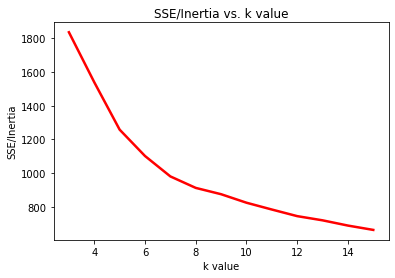

In [13]:
plt.plot(Kmeans_results["k"], Kmeans_results["SSE/Inertia"], linewidth = 2.5, color = "red") # Creating visualization to use elbow method
plt.xlabel("k value") # x axis label
plt.ylabel("SSE/Inertia") # y axis label
plt.title("SSE/Inertia vs. k value"); # title

In [14]:
# Using the silhouette score metric to determine k
range_n_clusters = [3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(policies_updated2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    score = silhouette_score(policies_updated2_scaled, cluster_labels)
    silhouette_avg.append(score)
    
silhouette_avg

[0.3759949123945799,
 0.3685818948587469,
 0.3552612148123111,
 0.3541938377016494,
 0.345344905669523,
 0.30725510165527514,
 0.30607381131655215,
 0.3040200725365346,
 0.31543053778594077,
 0.31149975508908745,
 0.2959016165169593,
 0.2838677258825392,
 0.2941981984459864]

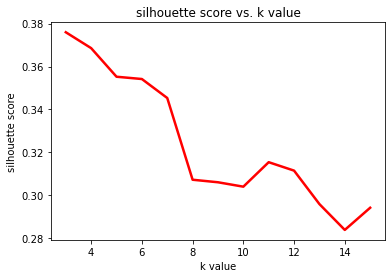

In [15]:
# visualizing silhouette scores
plt.plot(range_n_clusters, silhouette_avg, linewidth = 2.5, color = "red")
plt.xlabel("k value") # x axis label
plt.ylabel("silhouette score") # y axis label
plt.title("silhouette score vs. k value"); # title

In [16]:
best_kmeans = KMeans(n_clusters = 7) # Rerun k-means algorithm to get the algorithm with the best k result 
best_kmeans.fit(policies_updated2_scaled)

KMeans(n_clusters=7)

In [17]:
# Creating a column in the original data with the corresponding clusters
policies_updated2['kmeans_clusters'] = best_kmeans.labels_
policies_updated2

,gender,agecat,traffic_index,claim_office,numclaims,claimcst0,kmeans_clusters
15,1,5.0,105.0,1,1,1120.833360,4
18,1,3.0,25.5,0,2,4548.075015,4
28,0,4.0,136.3,3,1,2265.262185,0
30,0,2.0,111.0,3,3,6616.971570,0
39,0,4.0,129.6,1,2,225.489518,3
...,...,...,...,...,...,...,...
60348,1,6.0,109.0,0,1,467.640398,4
60349,1,4.0,106.5,1,1,804.425046,4
60372,1,4.0,132.0,2,1,490.897473,5
60373,1,1.0,76.4,3,1,402.791766,2


In [18]:
policies_updated2.groupby("kmeans_clusters").describe() # get summary statistics for each cluster.

gender                                     agecat            \
                  count mean  std  min  25%  50%  75%  max   count      mean   
kmeans_clusters                                                                
0                 958.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   958.0  2.947808   
1                1293.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1293.0  1.536736   
2                1577.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1577.0  2.391883   
3                 647.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   647.0  4.811437   
4                1729.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1729.0  4.058994   
5                 876.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   876.0  5.504566   
6                1043.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1043.0  1.995206   

                 ... numclaims      claimcst0                             \
                 ...       75%  max     count         mean           std   
kmeans_clusters  ...                                                       
0                ...       1.0  5.0     958.0  3963.896218   7404.429195   
1                ...       1.0  5.0    1293.0  4082.115406   7542.782824   
2                ...       1.0  5.0    1577.0  3560.443288   6977.828169   
3                ...       1.0  5.0     647.0  4359.391153   7988.422654   
4                ...       1.0  5.0    1729.0  3052.317178   6411.661329   
5                ...       1.0  5.0     876.0  5664.739487  10389.670962   
6                ...       1.0  5.0    1043.0  3452.912252   5899.105157   

                                                                                
                        min         25%          50%          75%          max  
kmeans_clusters                                                                 
0                100.921141  560.642141  1585.859577  3671.525005  60571.21295  
1                 80.363865  509.317724  1493.657274  4109.602241  64286.22502  
2                 88.706394  451.744641  1187.691290  3393.716674  56603.36124  
3                100.510491  454.076529  1497.208587  4534.751621  63226.12169  
4                 92.894136  369.562004   933.580456  2759.535173  64669.47257  
5                100.000175  550.129047  1896.146608  5910.498165  69478.89783  
6                 91.422129  583.627800  1431.197121  3759.240219  59699.78382  

[7 rows x 48 columns]

In [25]:
#visualizing through excel
policies_updated2_excel = policies_updated2.groupby('kmeans_clusters').describe()
policies_updated2_excel.to_excel('policies_updated2_summary.xlsx', index = True)

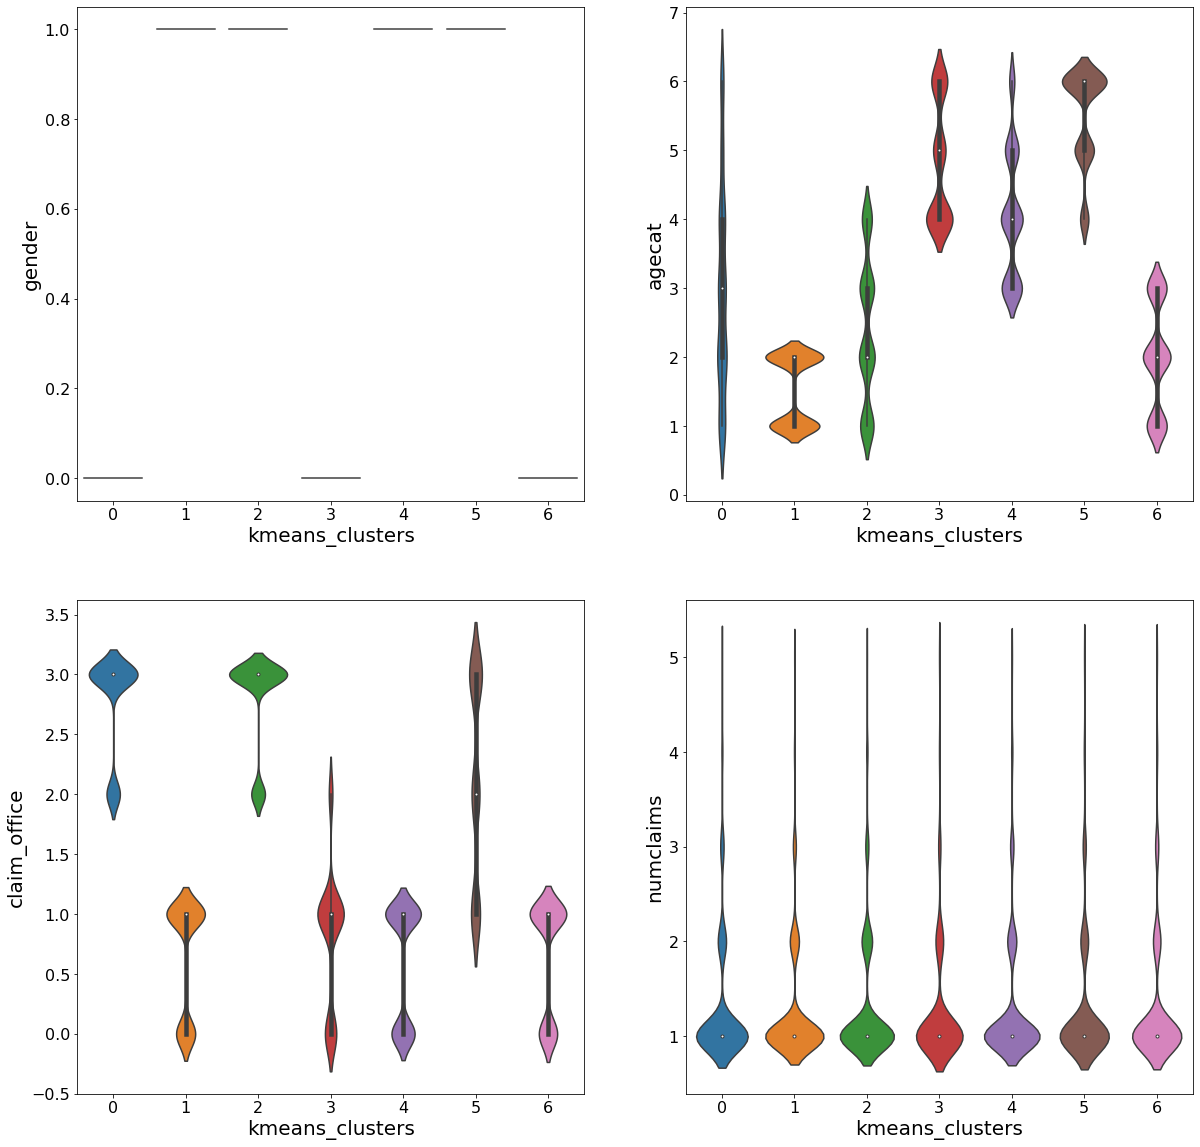

In [19]:
#visualizing through violin plots
fig, axes = plt.subplots(2, 2, figsize = (20,20)) # Create grid of subplots 

ax = sns.violinplot(data = policies_updated2, x = "kmeans_clusters", y = "gender", ax=axes[0,0]) # Define first plot
ax.set_xlabel('kmeans_clusters', fontsize = 20) # Parameters for first plot, making x label bigger
ax.set_ylabel('gender', fontsize = 20) # Parameters for first plot, making y label bigger
ax.tick_params(axis='x', labelsize=16)# Parameters for first plot, making x tick marks bigger
ax.tick_params(axis='y', labelsize=16)# Parameters for first plot, making y tick marks bigger

ax = sns.violinplot(data = policies_updated2, x = "kmeans_clusters", y = "agecat", ax=axes[0,1]) # Define second plot
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('agecat', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax = sns.violinplot(data = policies_updated2, x = "kmeans_clusters", y = "claim_office", ax=axes[1,0]) # Define third plot
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('claim_office', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax = sns.violinplot(data = policies_updated2, x = "kmeans_clusters", y = "numclaims", ax=axes[1,1]) # Define fourth plot
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('numclaims', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

#DBSCAN Clustering

In [20]:
eps = [0.1, 0.3, 0.5] # Define eps values
minpts = [4, 8, 12] # Define the minimum points values
sil_score = [] # empty list to store silhoutte score

for ep, minpt in itertools.product(eps,minpts): # Using itertools to get every posible combination of eps and minpoints
    clus = DBSCAN(eps =ep, min_samples=minpt).fit(policies_updated2_scaled) # Running DBSCAN in the loop
    score = silhouette_score(policies_updated2_scaled, clus.labels_) 
    sil_score.append(score)
    
sil_score

[0.269791162908523,
 0.22814018308356043,
 0.19090141732417323,
 0.18543565807204046,
 0.1891544094253142,
 0.18952325737737677,
 0.42513161217702744,
 0.4233771431665997,
 0.4233771431665997]

In [21]:
DBSCAN_results = pd.DataFrame(itertools.product(eps,minpts))
DBSCAN_results['silhouette_score'] = sil_score
DBSCAN_results
DBSCAN_results.sort_values(by='silhouette_score', ascending=False)
# results for the silhoutte_score
# the largest silhouette_score is 0.425132

,0,1,silhouette_score
6,0.5,4,0.425132
7,0.5,8,0.423377
8,0.5,12,0.423377
0,0.1,4,0.269791
1,0.1,8,0.228140
2,0.1,12,0.190901
5,0.3,12,0.189523
4,0.3,8,0.189154
3,0.3,4,0.185436


In [22]:
# labels
clus = DBSCAN(eps=0.5, min_samples=4).fit(policies_updated2_scaled)
clus1 = clus.labels_
clus1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
len(set(clus.labels_)) 
# 3 clusters are formed

3

In [26]:
DBSCAN_best = DBSCAN(eps = 0.5, min_samples = 4).fit(policies_updated2_scaled) 
policies_updated['DBSCAN_Clusters'] = DBSCAN_best.labels_ # Append to policies data
policies_updated
policies_updated.groupby('DBSCAN_Clusters').describe() # get summary statistics

C:\Users\david\AppData\Local\Temp/ipykernel_7144/3734856706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policies_updated['DBSCAN_Clusters'] = DBSCAN_best.labels_ # Append to policies data


pol_number                                          \
                     count          mean           std         min   
DBSCAN_Clusters                                                      
-1                     2.0  5.361751e+07  4.037116e+07  25070794.0   
 0                  5474.0  5.485972e+07  2.616585e+07  10025396.0   
 1                  2647.0  5.469490e+07  2.530465e+07  10077921.0   

                                                                   agecat  \
                         25%         50%          75%         max   count   
DBSCAN_Clusters                                                             
-1               39344153.75  53617513.5  67890873.25  82164233.0     2.0   
 0               32839037.25  54996066.5  77665975.00  99998382.0  5474.0   
 1               33342167.00  54011752.0  75843362.00  99984296.0  2647.0   

                           ...     claimcst0              annual_premium  \
                     mean  ...           75%          max          count   
DBSCAN_Clusters            ...                                             
-1               3.500000  ...  60266.895360  62843.74835            2.0   
 0               3.213920  ...   3613.755303  69478.89783         5474.0   
 1               3.028712  ...   3896.373373  63226.12169         2647.0   

                                                                               
                   mean           std     min     25%     50%     75%     max  
DBSCAN_Clusters                                                                
-1               716.53  0.000000e+00  716.53  716.53  716.53  716.53  716.53  
 0               716.53  8.231679e-11  716.53  716.53  716.53  716.53  716.53  
 1               716.53  2.387875e-11  716.53  716.53  716.53  716.53  716.53  

[3 rows x 72 columns]

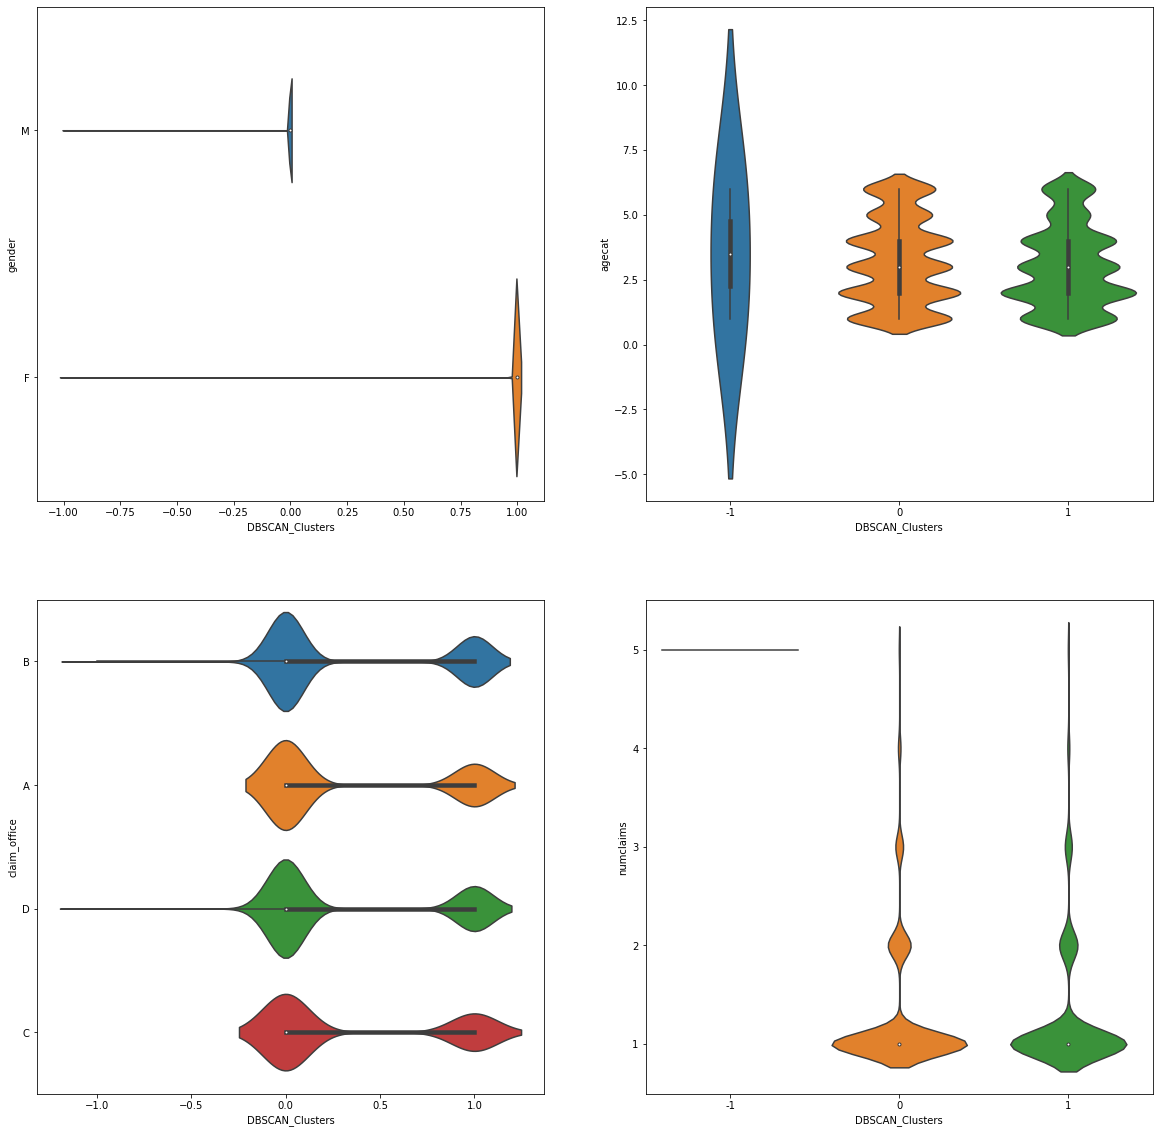

In [27]:
# Visualizing the data using violin plots
fig, axes = plt.subplots(2, 2, figsize = (20,20))

ax = sns.violinplot(data = policies_updated, x = "DBSCAN_Clusters", y = "gender", ax=axes[0,0])
ax = sns.violinplot(data = policies_updated, x = "DBSCAN_Clusters", y = "agecat", ax=axes[0,1])
ax = sns.violinplot(data = policies_updated, x = "DBSCAN_Clusters", y = "claim_office", ax=axes[1,0])
ax = sns.violinplot(data = policies_updated, x = "DBSCAN_Clusters", y = "numclaims", ax=axes[1,1])